# Problem Statement

#### The problem is to predict anomaly based on the readings captured by sensors.

`Overview`

`Objective`:
Evaluate candidates on their ability to work with tabular data, perform advanced analysis, and build robust predictive models.

• `Format`: Individual participation

• `Deliverables`: Jupyter Notebook with code

`Evaluation Criteria`
• Data Exploration and Preprocessing (20%):

• Handling missing values, outliers

• Feature engineering and correlation analysis

 `Modeling (60%)`:

• Application of classical models **(Logistic Regression, Support Vector Machine, KNN, Decision Trees) and advanced models (e.g. Random Forest, XGBoost, LightGBM, CatBoost, Neural Network etc.)**

• Justification for model selection and tuning strategies

`Model Evaluation (20%)`:

• Use of appropriate metrics (e.g. Accuracy , Precision, Recall, F1 Score)

•Robustness checks, e.g., backtesting and residual analysis

# Importing the libraries

In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_parquet(r"/content/drive/MyDrive/kaggle/celebal-ana-verse-h/train.parquet")
data

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


In [5]:
df = data.copy()

In [6]:
df

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


### Checking the quality of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB


In [ ]:
df.describe()

,Date,X1,X2,X3,X4,X5
count,1639424,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,1.139258e+00,5.488189e+00,4.110388e+32,2.706323e+29,1.187219e+00
min,2020-12-16 00:00:00,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2021-12-10 00:00:00,1.049171e+00,5.480597e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2022-11-30 00:00:00,1.105171e+00,5.488979e+00,1.000000e+00,1.000000e+00,6.931472e-01
75%,2023-11-23 00:00:00,1.214096e+00,5.496717e+00,1.000000e+00,2.718282e+00,2.890372e+00
max,2024-12-11 00:00:00,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00
std,NaN,1.391992e-01,1.342811e-02,2.346156e+35,5.812988e+31,1.304814e+00


In [ ]:
df['target'] = df['target'].astype(np.int8) # converting the object dtype to integer dtype

<Axes: xlabel='target', ylabel='count'>

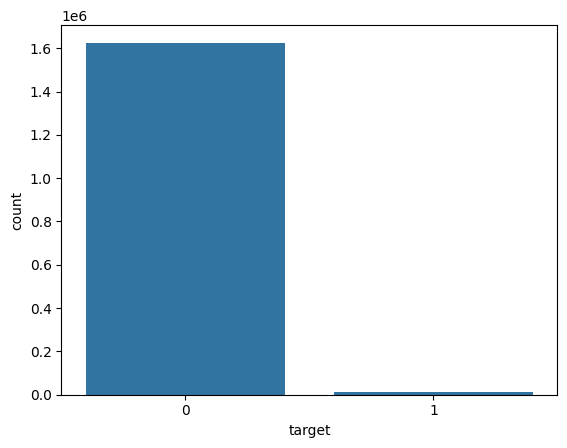

In [ ]:
sns.countplot(data = df,x='target')

### Plotting the box plot

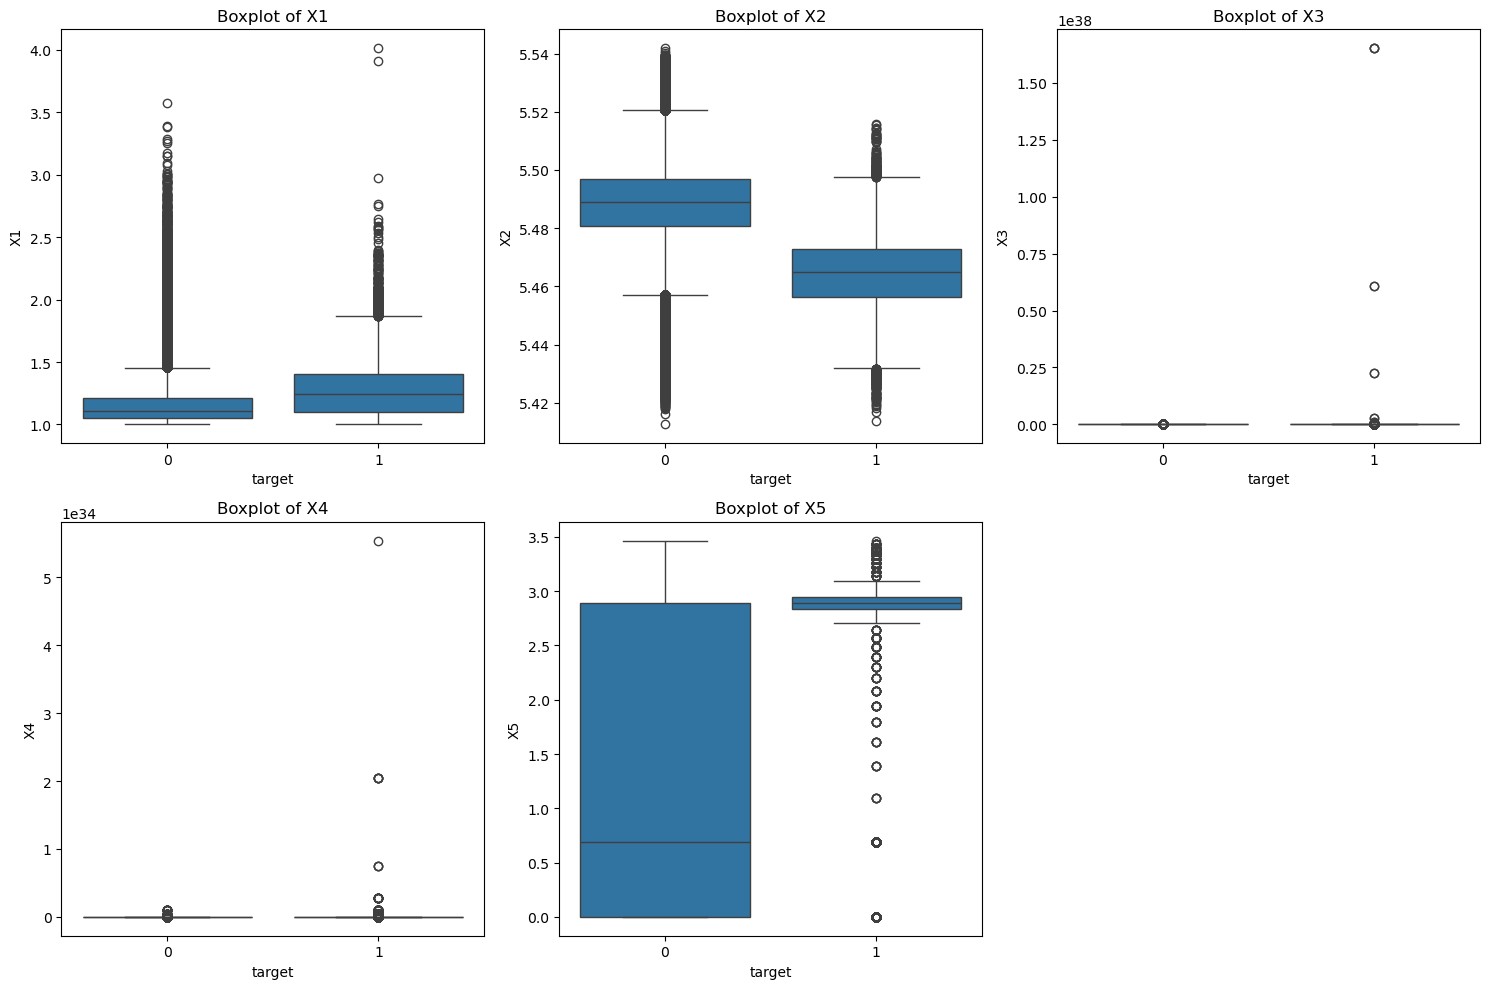

In [ ]:
numeric_cols = df.drop(columns=['Date', 'target']).columns

# Set up the figure
plt.figure(figsize=(15, 10))

# Plot boxplots for each feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df,y=col,x='target')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


### 🔹 `X1`
- Both classes are tightly centered around ~1.1.
- Class 0 has slightly more extreme outliers on the upper end.
- **Insight**: Slight separation, but not significant.

---

### 🔹 `X2`
- Class 0 is centered slightly higher (~5.49) than class 1 (~5.46).
- Spread is narrow but cleanly shifted.
- **Insight**: Small but consistent distribution shift — potentially useful for classification.

---

### 🔹 `X3`
- Extreme outliers present in both classes; several values in the range of `1e38`.
- Median and IQR are nearly identical across classes.
- **Insight**: Might not help much as-is due to huge outliers; **log-transform or capping** could help.

---

### 🔹 `X4`
- Same pattern as `X3`, with extreme values in the `1e34` range.
- Distributions are nearly identical for both classes in IQR.
- **Insight**: Heavy skew; likely needs **scaling or clipping** to become useful.

---

### 🔹 `X5`
- Class 0 has a wide spread from 0 to 3.5, with more variation.
- Class 1 is more compact and clustered near ~3.
- **Insight**: This feature has **high class-separating potential** — definitely valuable.

---


### Plot histograms to see the distribution

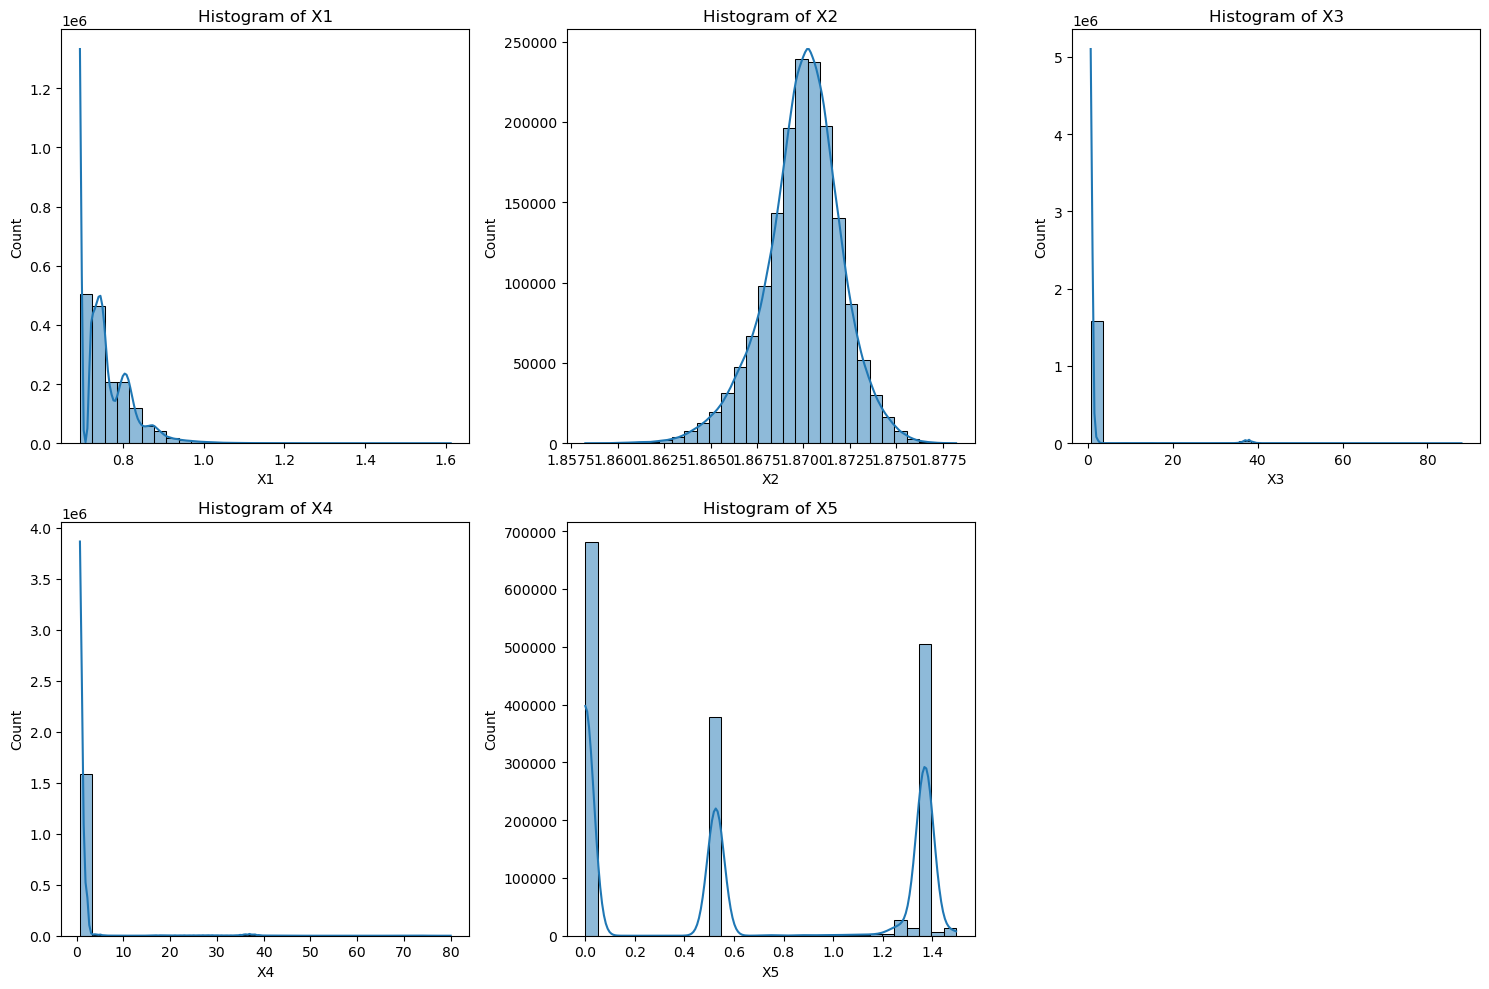

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(np.log1p(df[col]), kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

## Checking the non linear relation using spearman

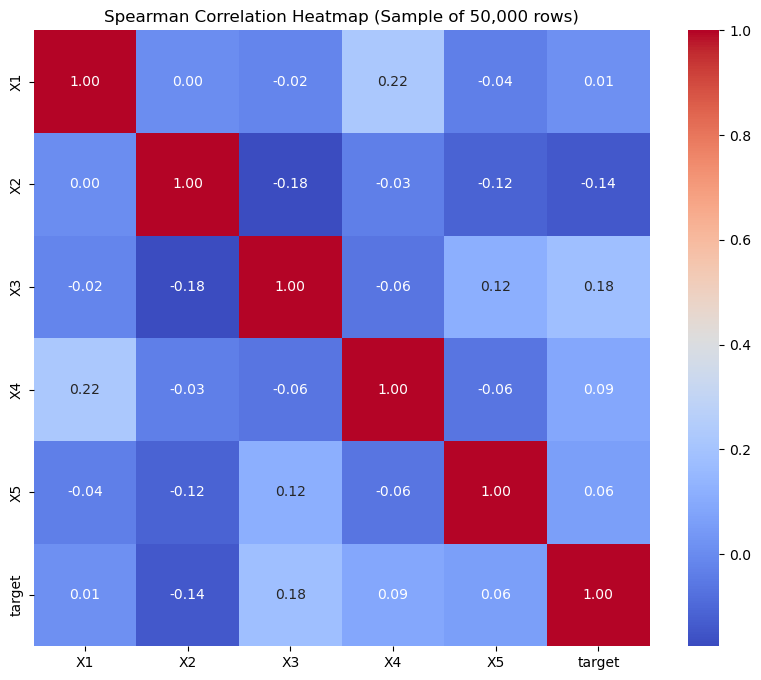

In [ ]:

spearman_corr_sample = df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_sample, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation Heatmap (Sample of 50,000 rows)")
plt.show()


### ✅ Correlation with `target`:
| Feature | Correlation | Insight |
|---------|-------------|---------|
| `X3`    | **+0.18**   | Most positively correlated with the target — important predictive feature. |
| `X2`    | **-0.14**   | Mild negative relationship — could help with classification. |
| `X4`    | +0.09       | Weak but positive association. |
| `X5`    | +0.06       | Slight correlation, might be useful in ensemble. |
| `X1`    | +0.01       | Very weak — unlikely to help on its own. |

---

## Checking a linear relaiton using pearson

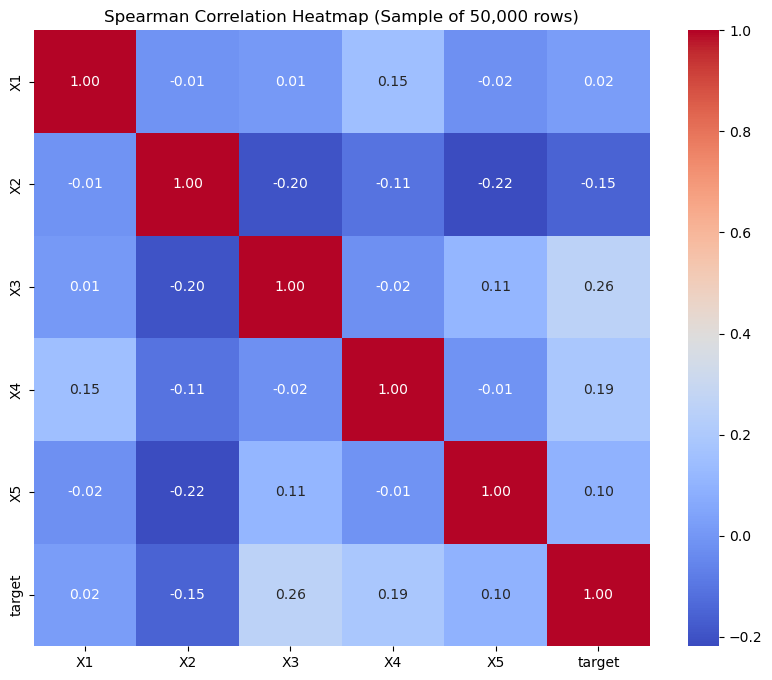

In [ ]:

spearman_corr_sample1 = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_sample1, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation Heatmap (Sample of 50,000 rows)")
plt.show()


### ✅ Correlation with `target`:
| Feature | Correlation | Insight |
|---------|-------------|---------|
| `X3`    | **+0.26**   | Strongest positive correlation — highly valuable feature. |
| `X4`    | +0.19       | Moderate positive correlation — potentially useful. |
| `X2`    | **-0.15**   | Mild negative correlation — useful in separating classes. |
| `X5`    | +0.10       | Weak positive correlation — might support other signals. |
| `X1`    | +0.02       | Very low correlation — low standalone value. |

---

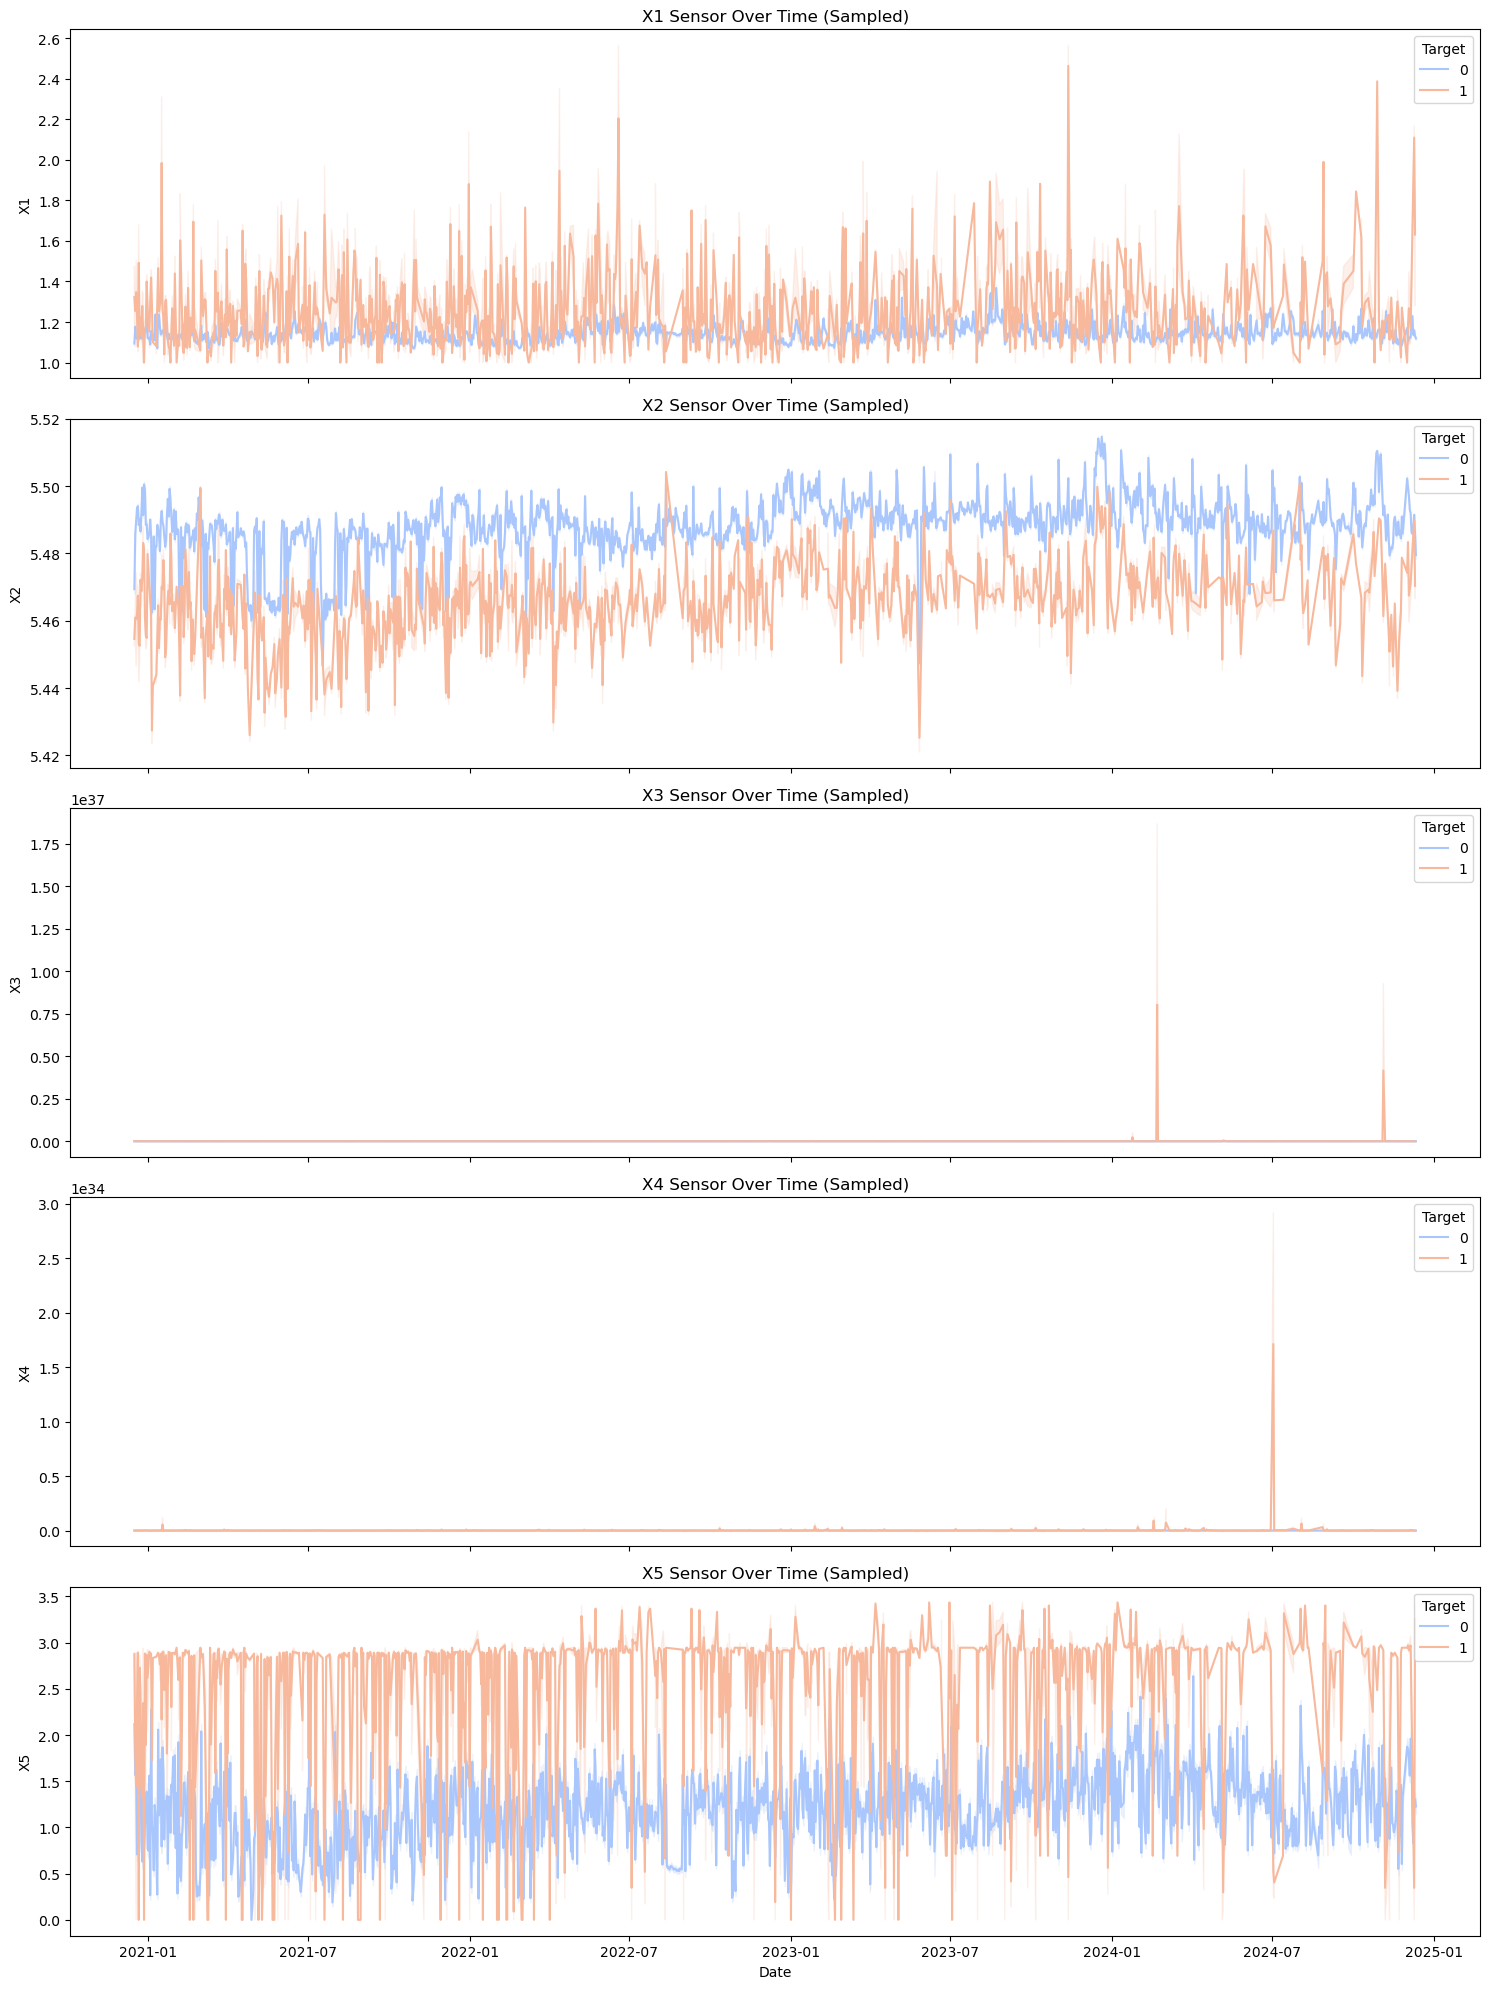

In [ ]:
sensors = ['X1', 'X2', 'X3', 'X4', 'X5']

fig, axs = plt.subplots(len(sensors), 1, figsize=(15, 20), sharex=True)

for i, sensor in enumerate(sensors):
    sns.lineplot(x='Date', y=sensor, data=df, hue='target', palette='coolwarm', ax=axs[i])
    axs[i].set_title(f"{sensor} Sensor Over Time (Sampled)")
    axs[i].legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Anomaly Rate by Month'}, xlabel='month'>

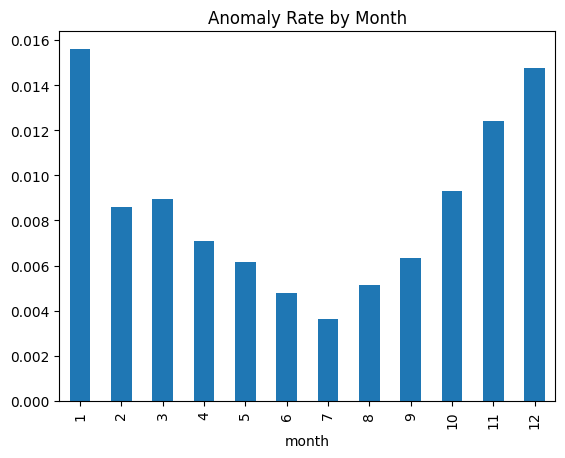

In [ ]:
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day
df['dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek
df.groupby('month')['target'].mean().plot(kind='bar', title='Anomaly Rate by Month')

# Data pre processing

#### Dropping the unuseful column

In [ ]:
df.drop(columns='Date',inplace=True)

In [8]:
df[df.duplicated()]

,Date,X1,X2,X3,X4,X5,target
119,2020-12-16,1.168826,5.454637,1.0,2.718282,2.890372,0
439,2020-12-17,1.000000,5.503338,1.0,1.000000,0.000000,0
467,2020-12-17,1.000000,5.500605,1.0,1.000000,0.000000,0
510,2020-12-17,1.000000,5.500156,1.0,1.000000,0.000000,0
538,2020-12-17,1.051271,5.496963,1.0,1.000000,2.944439,0
...,...,...,...,...,...,...,...
1639301,2024-11-26,1.000000,5.477718,1.0,1.000000,0.000000,0
1639304,2024-11-26,1.000000,5.473195,1.0,1.000000,0.000000,0
1639321,2024-11-26,1.000000,5.471766,1.0,1.000000,0.000000,0
1639362,2024-11-26,1.000000,5.478261,1.0,1.000000,0.000000,0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated()]

,Date,X1,X2,X3,X4,X5,target


In [11]:
df

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


In [12]:
df[df.duplicated()]

,Date,X1,X2,X3,X4,X5,target


In [ ]:
df['target'].value_counts()

,count
target,
0,1568076
1,14033


## Creating an outlier handling function

In [ ]:
# 1. Log transform for X3 and X4
for col in ['X3', 'X4']:
    df[col] = np.log1p(df[col])

# 2. Cap outliers in X3 and X4 at 1st and 99th percentile
def cap_outliers(df, col, lower=0.01, upper=0.99):
    q_low = df[col].quantile(lower)
    q_high = df[col].quantile(upper)
    df[col] = df[col].clip(q_low, q_high)

for col in ['X3', 'X4']:
    cap_outliers(df, col)

# 3. Remove IQR-based outliers for X1, X2, X5 — one by one to reduce memory load
def remove_iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['X1', 'X2', 'X5']:
    df = remove_iqr_outliers(df, col)

# Final shape of cleaned data
df.shape


(1497807, 10)

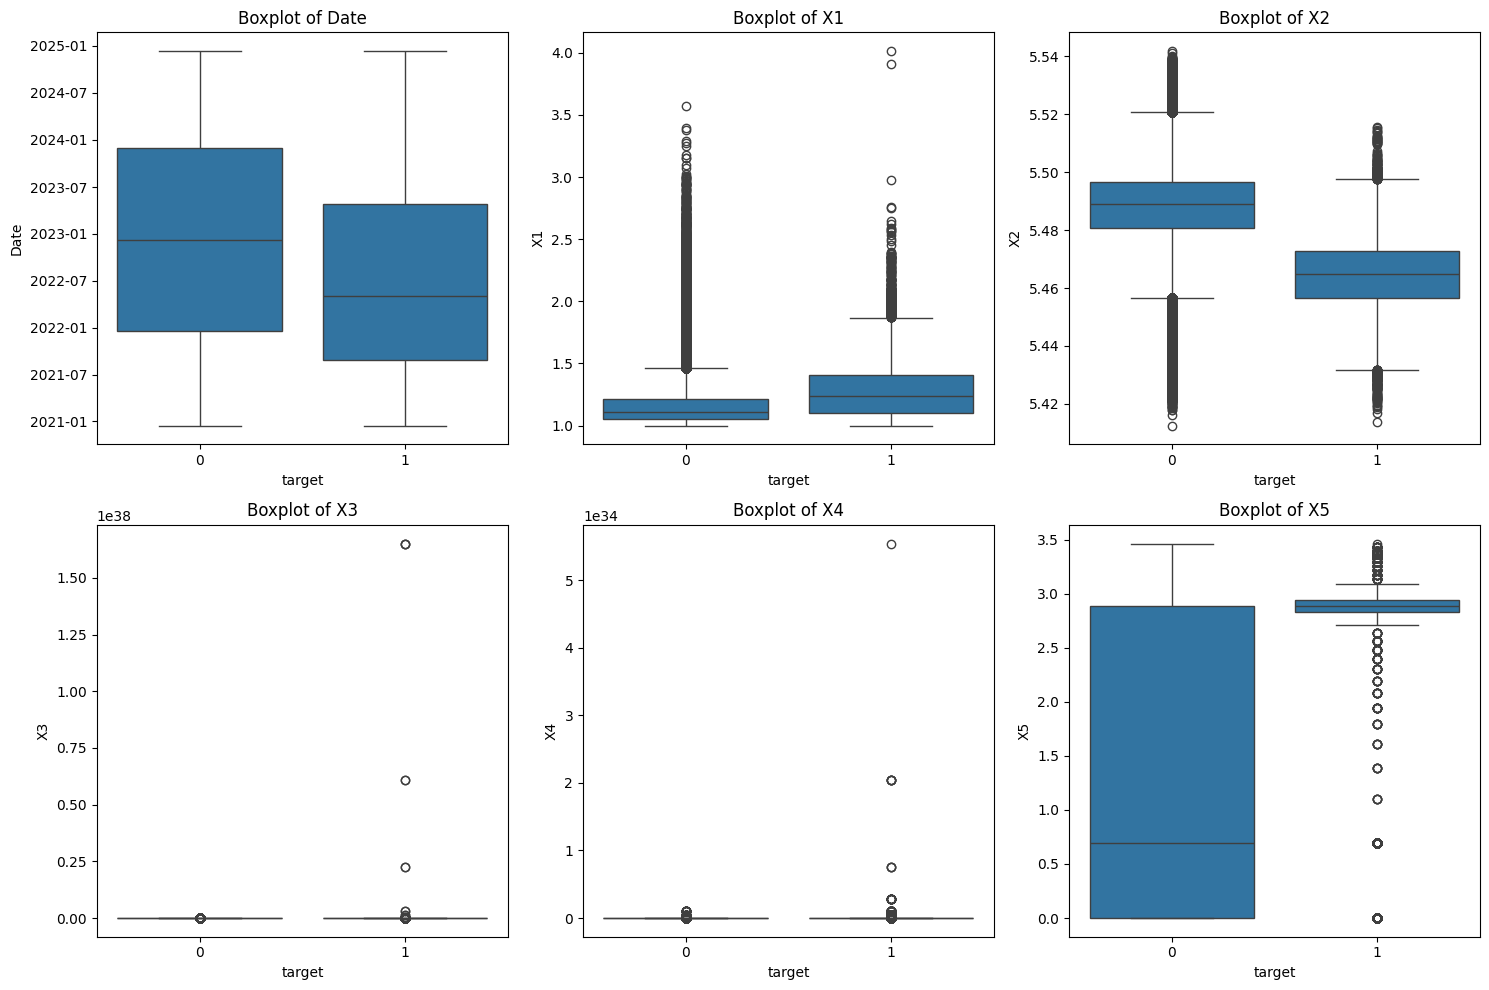

In [13]:
numeric_cols = df.drop(columns=[ 'target']).columns

# Set up the figure
plt.figure(figsize=(15, 10))

# Plot boxplots for each feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df,y=col,x='target')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Take a sample of 10,000 rows for efficient VIF calculation
sample_df = df.sample(n=10000, random_state=42)

# Drop non-numeric and target columns
features_sample = sample_df.iloc[:,1:]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features_sample.columns
vif_data["VIF"] = [variance_inflation_factor(features_sample.values, i) for i in range(features_sample.shape[1])]

vif_data


,Feature,VIF
0,X1,0.014610
1,X2,0.000006
2,X3,0.999900
3,X4,0.999291
4,X5,0.544018
5,target,1.078152


In [ ]:
df

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


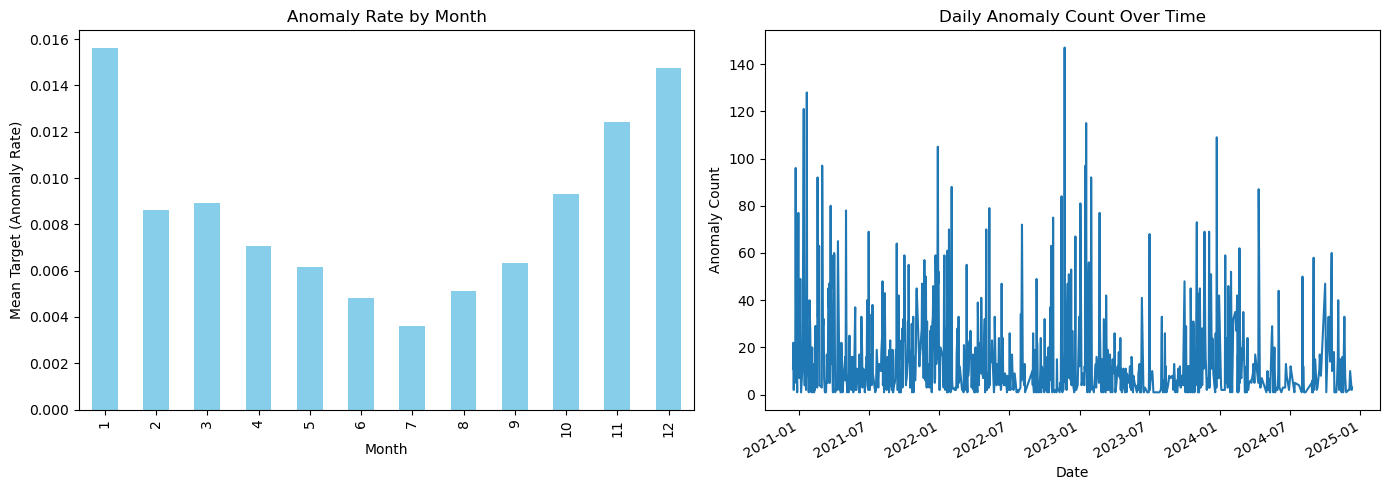

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time-based features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek

# Group and calculate anomaly rate (mean of target) by month
monthly_anomaly_rate = df.groupby('month')['target'].mean()

# Group and count anomalies by date
daily_anomaly_count = df[df['target'] == 1].groupby('Date').size()

# Plotting
plt.figure(figsize=(14, 5))

# Anomaly Rate by Month
plt.subplot(1, 2, 1)
monthly_anomaly_rate.plot(kind='bar', color='skyblue')
plt.title('Anomaly Rate by Month')
plt.ylabel('Mean Target (Anomaly Rate)')
plt.xlabel('Month')

# Daily Anomaly Count
plt.subplot(1, 2, 2)
daily_anomaly_count.plot()
plt.title('Daily Anomaly Count Over Time')
plt.ylabel('Anomaly Count')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


# Handling imbalance data

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop(columns=['Date','target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)



In [23]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from imblearn.combine import SMOTETomek


smote_tomek = SMOTETomek(random_state=42, n_jobs = -1)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train.astype(int))




## ANN

In [20]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam


2341840

In [39]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))

model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(X_resampled,y_resampled,batch_size=2**15,epochs=100,validation_split=0.2,callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.7745 - loss: 0.5221 - val_accuracy: 0.0000e+00 - val_loss: 1.7111
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.6520 - loss: 0.7038 - val_accuracy: 0.0000e+00 - val_loss: 1.0301
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.7160 - loss: 0.5541 - val_accuracy: 0.9204 - val_loss: 0.5694
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.7837 - loss: 0.4895 - val_accuracy: 0.0000e+00 - val_loss: 1.3137
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7512 - loss: 0.5339 - val_accuracy: 0.9485 - val_loss: 0.2047
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7405 - loss: 0.5688 - val_accuracy: 0.0000e+00 - val_loss: 1.1135
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7781 - loss: 0.4988 - val_accuracy: 0.4401 - val_loss: 1.4412
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.7449 - loss: 0.54

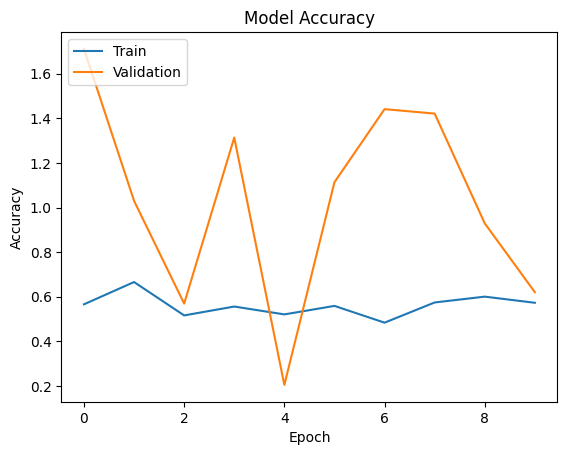

In [42]:
plt.plot(model.history.history['loss'],label='train loss')
plt.plot(model.history.history['val_loss'],label = 'test loss')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [43]:
from sklearn.metrics import log_loss

log_loss(y_test,model.predict(X_test_scaled))

12361/12361 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


0.5485556625436611

## Got a log Loss of 0.54

## --The End --